In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from tensorflow.keras.utils import plot_model
import numpy as np
import os

C:\Users\Misha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE = 10
EPOCHS = 100
LEARNING_RATE = 0.001

# Preparing train and test datasets

In [3]:
(train_data, val_data, test_data), metadata = tfds.load('iris', 
                                                        split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                                                        with_info=True)
print(metadata.features)

FeaturesDict({
    'features': Tensor(shape=(4,), dtype=float32),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
})


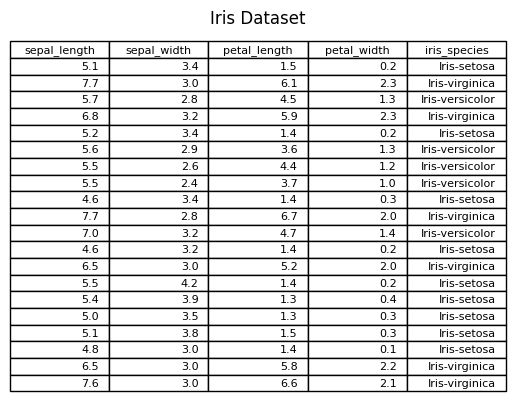

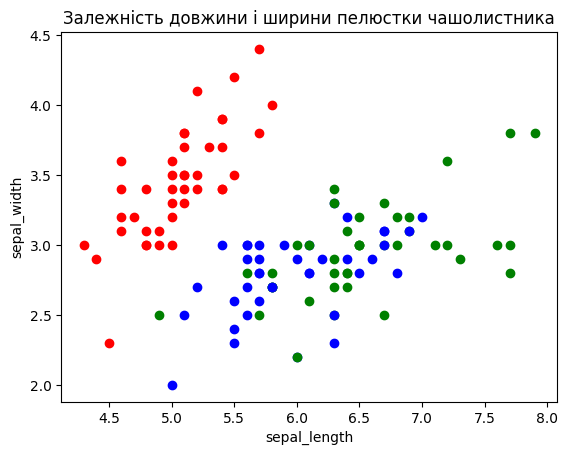

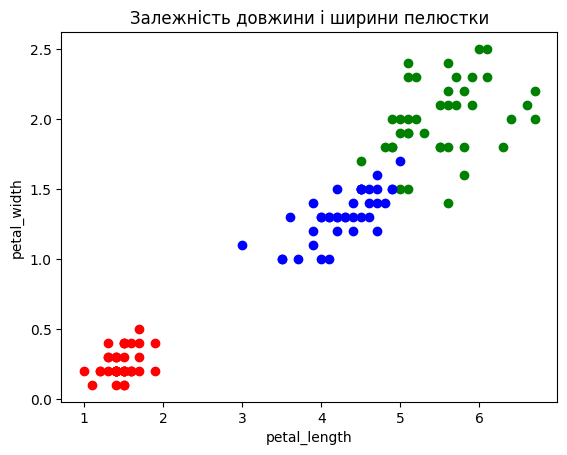

In [4]:
num_classes = (metadata.features["label"].num_classes)
names_clasess = (metadata.features["label"].names)

sepal_length = []
sepal_width = []
petal_length = []
petal_width = []
iris_species = []

for dataset in train_data:
    sepal_length.append(dataset['features'].numpy()[0])
    sepal_width.append(dataset['features'].numpy()[1])
    petal_length.append(dataset['features'].numpy()[2])
    petal_width.append(dataset['features'].numpy()[3])
    iris_species.append(names_clasess[dataset['label'].numpy()])

colors = {'Iris-setosa': 'r', 'Iris-virginica': 'g', 'Iris-versicolor': 'b'}

plt.axis('off')
plt.title('Iris Dataset')
df = pd.DataFrame({
    "sepal_length": list(map(lambda x: str(x), sepal_length[:20])),
    "sepal_width":list(map(lambda x: str(x),  sepal_width[:20])),
    "petal_length": list(map(lambda x: str(x), petal_length[:20])),
    "petal_width":list(map(lambda x: str(x),  petal_width[:20])),
    "iris_species": iris_species[:20],
    
})
plt.table(cellText=df.values, colLabels=df.columns, loc='center')
plt.show()

for i in range(len(sepal_length)):
    plt.scatter(sepal_length[i],
               sepal_width[i], color=colors[iris_species[i]])
plt.title('Залежність довжини і ширини пелюстки чашолистника')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

for i in range(len(petal_length)):
    plt.scatter(petal_length[i],
               petal_width[i], color=colors[iris_species[i]])
plt.title('Залежність довжини і ширини пелюстки')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()


In [5]:
def preprocess(dataset):
    features = tf.cast(dataset['features'], dtype=tf.float32)
    label = tf.cast(dataset['label'], dtype=tf.float32)
    return features, label

train_data = train_data.map(preprocess).batch(BATCH_SIZE)
val_data = val_data.map(preprocess).batch(BATCH_SIZE)
test_data = test_data.map(preprocess).batch(BATCH_SIZE)


# Defining Classification Model

In [6]:
def simple_mlp_model(num_classes):
    input_ = tf.keras.layers.Input(shape=(4,))
    x = tf.keras.layers.Dense(20, activation='relu')(input_)
    # x = tf.keras.layers.Dense(10, activation='relu')(x)
    output_ = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    return tf.keras.models.Model(input_, output_, name='Classifier')

num_classes = metadata.features['label'].num_classes
model = simple_mlp_model(num_classes)
model.summary()

Model: "Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


# Training model

In [7]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(LEARNING_RATE,
                                                             decay_steps=100000,
                                                             decay_rate=0.96)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

history = model.fit(train_data, epochs=EPOCHS, validation_data=val_data)

Epoch 1/100
12/12 [==============================] - 1s 27ms/step - loss: 2.0379 - accuracy: 0.3250 - val_loss: 1.7918 - val_accuracy: 0.3333
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.7103 - accuracy: 0.3250 - val_loss: 1.5109 - val_accuracy: 0.3333
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.4740 - accuracy: 0.3250 - val_loss: 1.3176 - val_accuracy: 0.3333
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.3087 - accuracy: 0.3167 - val_loss: 1.1853 - val_accuracy: 0.3333
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 1.1888 - accuracy: 0.2250 - val_loss: 1.0908 - val_accuracy: 0.3333
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0997 - accuracy: 0.2667 - val_loss: 1.0209 - val_accuracy: 0.4000
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0310 - accuracy: 0.3250 - val_loss: 0.9658 - val_accuracy: 0.3333
Epoch 8/100

# Evaluation Model results

In [8]:
metrics = model.evaluate(test_data, batch_size=BATCH_SIZE, verbose=1)
metric_names = ['test_loss', 'test_accuracy']

for name, value in zip(metric_names, metrics):
    print(f'{name} : {value}')

2/2 [==============================] - 0s 5ms/step - loss: 0.1937 - accuracy: 1.0000
test_loss : 0.1936805099248886
test_accuracy : 1.0


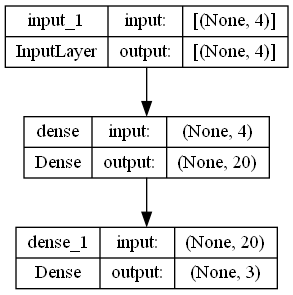

In [9]:
plot_model(model, show_shapes=True, expand_nested=True)

# Plotting train, test losses and accuracy

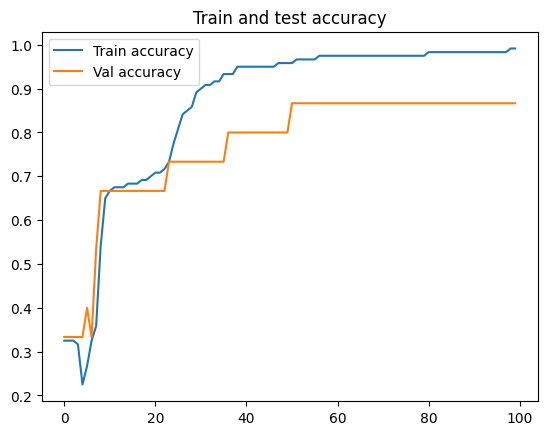

<Figure size 10000x10000 with 0 Axes>

In [10]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val accuracy')
plt.title('Train and test accuracy')
plt.legend()
plt.figure(figsize = (100,100))
plt.show()

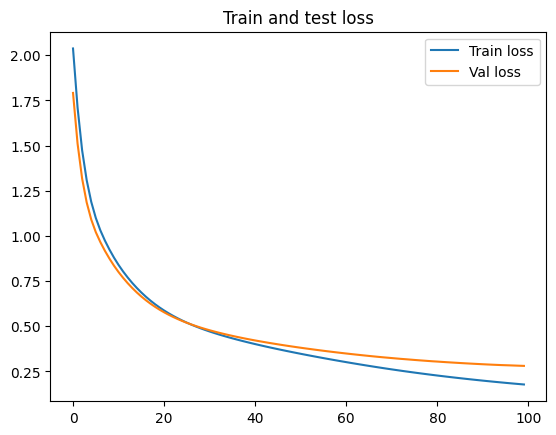

<Figure size 20000x20000 with 0 Axes>

In [11]:
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Val loss')
plt.title('Train and test loss')
plt.legend()
plt.figure(figsize = (200,200))
plt.show()